In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)

import warnings
warnings.filterwarnings('ignore')

In [9]:
df_agg = pd.read_csv('data/aggregate_data.csv')
df_agg.drop(columns='Unnamed: 0',inplace=True)

In [79]:
df_norm = pd.read_csv('data/pbp_data_mvp.csv')
df_norm.drop(columns='Unnamed: 0',inplace=True)
df_norm.Date = pd.to_datetime(df_norm.Date)

In [115]:
df_norm.head(5)

,Date,game_in_series,day_of_week,away_team,away_league,away_team_game_number,home_team,home_league,home_team_game_number,away_team_score,home_team_score,number_of_outs,day_or_night,date_game_completed,forfeit_info,protest_info,park_id,attendance,time_of_game,away_line_scores,home_line_scores,away_at_bats,away_hits,away_doubles,away_triples,away_hrs,away_rbi,away_sh,away_sf,away_hbp,away_walk,away_int_walk,away_so,away_sb,away_cs,away_gidp,away_catch_interference,away_left_on_base,away_pitchers_used,away_pitch_earned_runs,away_team_earned_runs,away_pitch_wild_pitches,away_pitch_balks,away_def_putouts,away_def_assists,away_def_errors,away_def_passed_balls,away_def_double_plays,away_def_triple_plays,home_at_bats,home_hits,home_doubles,home_triples,home_hrs,home_rbi,home_sh,home_sf,home_hbp,home_walk,home_int_walk,home_so,home_sb,home_cs,home_gidp,home_catch_interference,home_left_on_base,home_pitchers_used,home_pitch_earned_runs,home_team_earned_runs,home_pitch_wild_pitches,home_pitch_balks,home_def_putouts,home_def_assists,home_def_errors,home_def_passed_balls,home_def_double_plays,home_def_triple_plays,hb_ump_id,hb_ump_name,1b_ump_id,1b_ump_name,2b_ump_id,2b_ump_name,3b_ump_id,3b_ump_name,lf_ump_id,lf_ump_name,rf_ump_id,rf_ump_name,away_team_manager_id,away_team_manager_name,home_team_manager_id,home_team_manager_name,win_pitch_id,win_pitch_name,lose_pitch_id,lose_pitch_name,save_pitch_id,save_pitch_name,game_win_rbi_batter_id,game_win_rbi_batter_name,away_start_pitch_id,away_start_pitch_name,home_start_pitch_id,home_start_pitch_name,away_player_1_id,away_player_1_name,away_player_1_def_pos,away_player_2_id,away_player_2_name,away_player_2_def_pos,away_player_3_id,away_player_3_name,away_player_3_def_pos,away_player_4_id,away_player_4_name,away_player_4_def_pos,away_player_5_id,away_player_5_name,away_player_5_def_pos,away_player_6_id,away_player_6_name,away_player_6_def_pos,away_player_7_id,away_player_7_name,away_player_7_def_pos,away_player_8_id,away_player_8_name,away_player_8_def_pos,away_player_9_id,away_player_9_name,away_player_9_def_pos,home_player_1_id,home_player_1_name,home_player_1_def_pos,home_player_2_id,home_player_2_name,home_player_2_def_pos,home_player_3_id,home_player_3_name,home_player_3_def_pos,home_player_4_id,home_player_4_name,home_player_4_def_pos,home_player_5_id,home_player_5_name,home_player_5_def_pos,home_player_6_id,home_player_6_name,home_player_6_def_pos,home_player_7_id,home_player_7_name,home_player_7_def_pos,home_player_8_id,home_player_8_name,home_player_8_def_pos,home_player_9_id,home_player_9_name,home_player_9_def_pos,additional_info,acquisition_info,year,outcome,home_OBP,away_OBP,home_AVG,away_AVG,home_singles,away_singles,home_SLG,away_SLG,home_BABIP,away_BABIP,home_ISO,away_ISO,home_PASO,away_PASO,home_total_bases,away_total_bases,home_runs_created,away_runs_created,home_wOBA,away_wOBA,game_number_of_season,home_won_last_game,away_won_last_game,id,target,away_outcome,home_outcome
0,2000-03-30,0,Thu,NYN,NL,2,CHN,NL,2,5,1,66,N,NaN,NaN,NaN,TOK01,55000.0,235,00001000004,00001000000,37,6,2,0,1,5,1,1,1,8,0,5,1,0,0,0,10,5,0,0,0,0,33,14,2,0,2,0,36,5,0,0,0,0,2,0,0,6,1,9,0,0,2,0,10,7,5,5,0,0,33,14,0,0,0,0,herna901,Angel Hernandez,fostm901,Marty Foster,kulpr901,Ron Kulpa,marsr901,Randy Marsh,NaN,(none),NaN,(none),valeb102,Bobby Valentine,bayld001,Don Baylor,cookd001,Dennis Cook,yound002,Danny Young,NaN,(none),agbab001,Benny Agbayani,reedr002,Rick Reed,farnk001,Kyle Farnsworth,hendr001,Rickey Henderson,7,hamid001,Darryl Hamilton,8,alfoe001,Edgardo Alfonzo,4,piazm001,Mike Piazza,2,ventr001,Robin Ventura,5,belld001,Derek Bell,9,zeilt001,Todd Zeile,3,ordor001,Rey Ordonez,6,reedr002,Rick Reed,1,youne001,Eric Young,4,bufod001,Damon Buford,8,sosas001,Sammy Sosa,9,gracm001,Mark Grace,3,rodrh001,Henry Rodriguez,7,andrs001,Shane Andrews,5,husoj001,Jeff Huson,6,giraj001,Joe Girardi,2,farnk001,Kyle Farnsworth,1,NaN,Y,2000,0,0.261905,0.319149,0.138889,0.162162,5,3,0.138889,0.297297,0.185185,0.156250,0.000000,

In [116]:
df_agg.head(5)

,Date,home_team,away_team,home_team_score,home_at_bats,home_hits,home_doubles,home_triples,home_hrs,home_rbi,home_sh,home_sf,home_hbp,home_walk,home_int_walk,home_so,home_sb,home_cs,home_gidp,home_left_on_base,home_pitchers_used,home_pitch_earned_runs,home_team_earned_runs,home_pitch_wild_pitches,home_def_putouts,home_def_assists,home_def_errors,home_def_passed_balls,home_def_double_plays,home_def_triple_plays,home_OBP,home_AVG,home_singles,home_SLG,home_BABIP,home_ISO,home_PASO,home_total_bases,home_runs_created,home_wOBA,home_outcome,away_team_score,away_at_bats,away_hits,away_doubles,away_triples,away_hrs,away_rbi,away_sh,away_sf,away_hbp,away_walk,away_int_walk,away_so,away_sb,away_cs,away_gidp,away_left_on_base,away_pitchers_used,away_pitch_earned_runs,away_team_earned_runs,away_pitch_wild_pitches,away_def_putouts,away_def_assists,away_def_errors,away_def_passed_balls,away_def_double_plays,away_def_triple_plays,away_OBP,away_AVG,away_singles,away_SLG,away_BABIP,away_ISO,away_PASO,away_total_bases,away_runs_created,away_wOBA,away_outcome
0,2000-03-30,CHN,NYN,1.0,36.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0,9.0,0.0,0.0,2.0,10.0,7.0,5.0,5.0,0.0,33.0,14.0,0.0,0.0,0.0,0.0,0.261905,0.138889,5.0,0.138889,0.185185,0.000000,4.000000,5.0,1.309524,0.209512,0.0,5.0,37.0,6.0,2.0,0.0,1.0,5.0,1.0,1.0,1.0,8.0,0.0,5.0,1.0,0.0,0.0,10.0,5.0,0.0,0.0,0.0,33.0,14.0,2.0,0.0,2.0,0.0,0.319149,0.162162,3.0,0.297297,0.156250,0.135135,7.400000,11.0,3.422222,0.288298,1.0
1,2000-04-03,SLN,CHN,7.0,34.0,10.0,1.0,1.0,3.0,7.0,0.0,0.0,0.0,7.0,0.0,6.0,3.0,0.0,0.0,10.0,4.0,1.0,1.0,0.0,27.0,8.0,0.0,0.0,1.0,0.0,0.414634,0.294118,5.0,0.647059,0.280000,0.352941,5.666667,22.0,9.121951,0.450488,1.0,1.0,36.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0,9.0,0.0,0.0,2.0,10.0,7.0,5.0,5.0,0.0,33.0,14.0,0.0,0.0,0.0,0.0,0.261905,0.138889,5.0,0.138889,0.185185,0.000000,4.000000,5.0,1.309524,0.209512,0.0
2,2000-04-03,ATL,COL,2.0,30.0,7.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,6.0,2.0,0.0,0.0,0.0,27.0,12.0,0.0,0.0,1.0,0.0,0.281250,0.233333,5.0,0.433333,0.227273,0.200000,5.000000,13.0,3.354839,0.314375,1.0,0.0,31.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,7.0,0.0,0.0,1.0,7.0,3.0,2.0,2.0,1.0,24.0,10.0,0.0,0.0,1.0,0.0,0.242424,0.193548,4.0,0.258065,0.250000,0.064516,4.428571,8.0,1.939394,0.241290,0.0
3,2000-04-03,CIN,MIL,3.0,19.0,5.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,16.0,8.0,2.0,0.0,0.0,0.0,0.300000,0.263158,3.0,0.473684,0.285714,0.210526,4.750000,9.0,2.700000,0.336500,-1.0,3.0,22.0,7.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,8.0,1.0,3.0,3.0,0.0,15.0,5.0,0.0,0.0,0.0,0.0,0.444444,0.318182,6.0,0.363636,0.333333,0.045455,22.000000,8.0,3.555556,0.372593,-1.0
4,2000-04-03,MIA,SFN,6.0,36.0,12.0,3.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,8.0,3.0,4.0,4.0,0.0,27.0,15.0,0.0,0.0,2.0,0.0,0.368421,0.333333,9.0,0.416667,0.413793,0.083333,5.142857,15.0,5.270270,0.348158,1.0,4.0,35.0,10.0,2.0,2.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,24.0,7.0,2.0,0.0,1.0,0.0,0.305556,0.285714,5.0,0.542857,0.346154,0.257143,4.375000,19.0,5.805556,0.361667,0.0


Questions to answer:
- On average how many runs does a team win by when they win
- Has scoring increased or decreased over the past 20 years
- what stat has the greatest difference between the winning and loosing team
- Does a higher number of pitchers used indicate a loosing team

## Number of runs game won by

In [26]:
# QUESTION: On average how many runs does a team win by when they win
df_avg_run_win = df_norm[['home_team_score','away_team_score','home_outcome','away_outcome']]
# getting rid of ties
df_avg_run_win = df_avg_run_win[(df_avg_run_win.home_outcome != -1)|(df_avg_run_win.away_outcome != -1)]
df_avg_run_win['score_differnce'] = np.abs(df_avg_run_win['home_team_score']-df_avg_run_win['away_team_score'])

In [71]:
score_diffs = list(df_avg_run_win['score_differnce'])
total_number_of_games = len(score_diffs)
score_diff_dict = {}
for item in score_diffs:
    if item in score_diff_dict:
        score_diff_dict[item] +=1
    else:
        score_diff_dict[item] = 1
for item in score_diff_dict:
    score_diff_dict[item] = score_diff_dict[item]/total_number_of_games

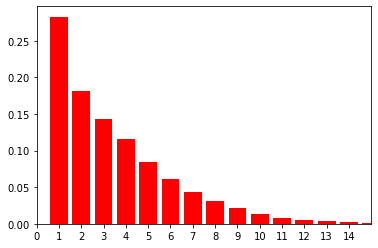

In [74]:
fig, ax = plt.subplots()
ax.bar(score_diff_dict.keys(),score_diff_dict.values(),color='red')
ax.set_xlim(left = 0,right=15)
ax.set_xticks(range(0,15,1));

## How much more does the home team win

In [106]:
home_or_away_dict = {
    'home':0,
    'away':0
}
home_win_list = list(df_norm.home_outcome)
total_games = len(home_win_list)
for outcome in home_win_list:
    if outcome == 1:
        home_or_away_dict['home']+=1
    else:
        home_or_away_dict['away']+=1
home_or_away_dict['home'] = home_or_away_dict['home']/total_games
home_or_away_dict['away'] = home_or_away_dict['away']/total_games

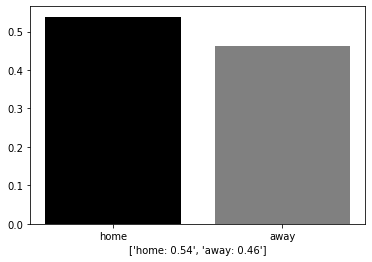

In [111]:
fig,ax = plt.subplots()
ax.bar(home_or_away_dict.keys(),home_or_away_dict.values(),color=['black','grey'])
ax.set_xlabel(xlabel=[('home: '+str(round(home_or_away_dict['home'],2))),('away: '+str(round(home_or_away_dict['away'],2)))]);

## Scoring over the past 20 years

In [81]:
year_score_dict = {}
for year in range(2000,2020,1):
    year_score_dict[year] = 0
    df_year_scoring = df_norm[(df_norm.Date.dt.year == year)]
    for index, row in df_year_scoring.iterrows():
        year_score_dict[year] += (row.home_team_score+row.away_team_score)

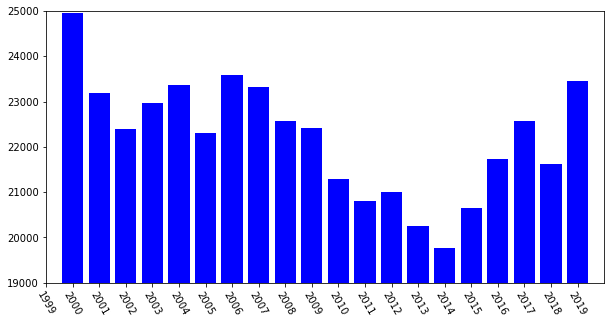

In [114]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(year_score_dict.keys(),year_score_dict.values(),color='blue')
ax.set_xlim(left = 1999,right=2020)
ax.set_xticks(range(1999,2020,1));
ax.set_ylim(bottom=19000,top=25000)
ax.set_xticklabels(labels = range(1999,2020,1),rotation=-60);

## Difference between winning and loosing team

### Looking at Classic Stats

#### OBP

#### AVG